Titanic DataAnalysis
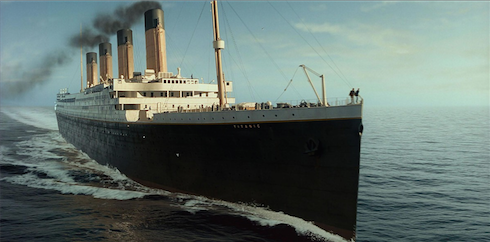

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
from jupyterthemes import jtplot
jtplot.style(ticks=True, grid=False)
%matplotlib inline

In [37]:
#reading the Titanic excel file
titanicDf = pd.read_excel('titan.xls')

In [38]:
#Display first 5 info
titanicDf.head()
#Survived "0=no, 1=yes"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
titanicDf.describe()
#By analysing the above cell we can see the Max and Min age, survival rate etc. 
#The max age of a person in the Titanic was 80.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
#removing unwanted data
titanicDf.drop(['SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,S


<AxesSubplot:>

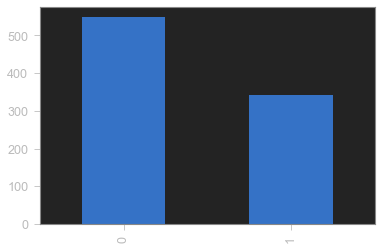

In [42]:
pd.value_counts(titanicDf['Survived']).plot.bar()
#The graph shows "0 = ppl who died", "1 = people who survived"

In [44]:
titanicDf['Survived'].mean()
#only 38% of the people survived

0.3838383838383838

In [46]:
titanicDf.groupby(['Sex']).mean()
#Female survival rate = "74%" and Male = "18%"

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [48]:
titanicDf.groupby(['Sex', 'Pclass']).mean()
#Divided into 1st, 2nd and 3rd class tickets

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

In [49]:
titanicDf[titanicDf['Age']<18].groupby(['Sex', 'Pclass']).mean()
#Under the age of 18.All of the Females in 2nd class survived
#All male under 18 in 1st class survived

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        26.241667  
       3        18.727977  
male   1       116.072900  
       2        25.659473  
       3        22.752523

Sex     Pclass
female  1         AxesSubplot(0.125,0.125;0.775x0.755)
        2         AxesSubplot(0.125,0.125;0.775x0.755)
        3         AxesSubplot(0.125,0.125;0.775x0.755)
male    1         AxesSubplot(0.125,0.125;0.775x0.755)
        2         AxesSubplot(0.125,0.125;0.775x0.755)
        3         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

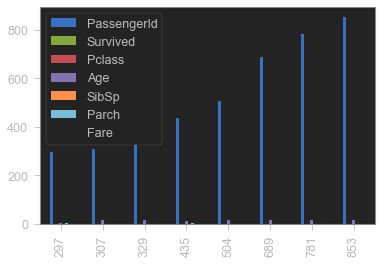

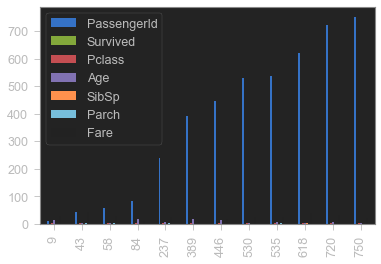

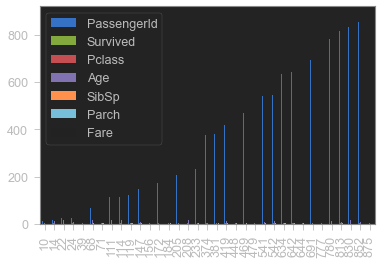

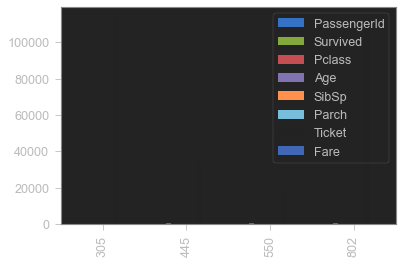

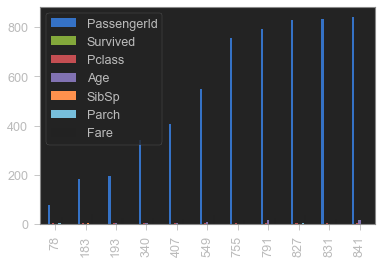

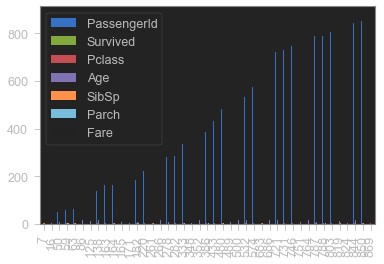

In [50]:
#Bar graphs
titanicDf[titanicDf['Age']<18].groupby(['Sex', 'Pclass']).plot.bar()

<a href="https://www.youtube.com/watch?v=dcqPhpY7tWk&pbjreload=101">Showing Text</a>